![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

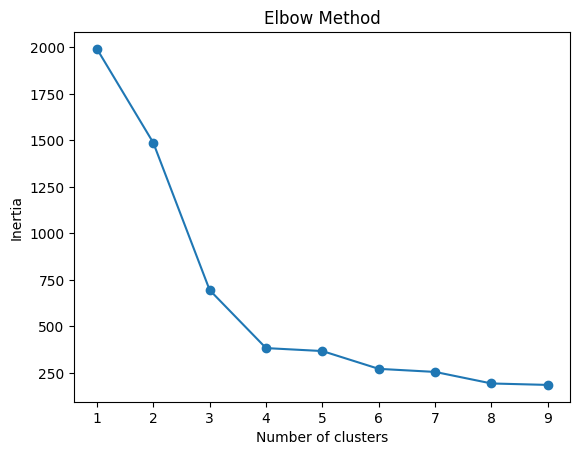

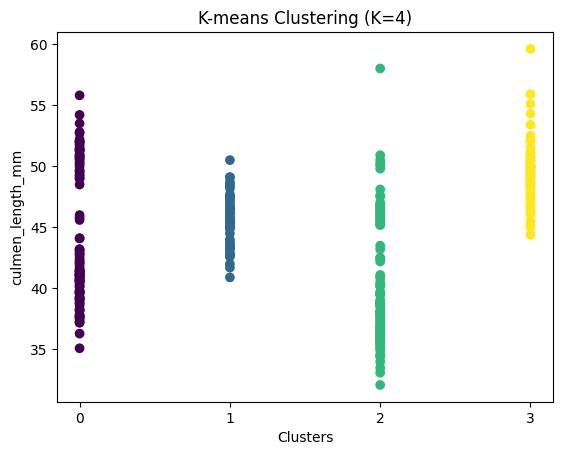

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,45.563793,14.237931,212.706897,4679.741379
2,40.217757,17.611215,189.046729,3419.158879
3,49.473770,15.718033,221.540984,5484.836066


In [33]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df

# Perform preprocessing steps on the dataset to create dummy variables
# Using get dummies method on the categorical feature
categorical = pd.get_dummies(penguins_df["sex"], dtype=int)
penguins_numerical = penguins_df.drop(columns="sex")
penguins_categorical = pd.concat([penguins_numerical, categorical], axis=1)

# Recommended: standardizing/scaling before clustering
scaler = StandardScaler()
X = scaler.fit_transform(penguins_categorical)
penguins_scaler = pd.DataFrame(X, columns=penguins_categorical.columns)

# Detect the optimal number of clusters for k-means clustering
# Perform Elbow analysis
inertias = []

for i in range(1, 10):

    kmeans = KMeans(n_clusters=i, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Run the k-means clustering algorithm
# k-means clustering using sklearn library and visualize the clusters
n_clusters=4
kmeans_cluster_4 = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_scaler)
penguins_df["label"] = kmeans_cluster_4.labels_

plt.scatter(penguins_df["label"], penguins_df["culmen_length_mm"], c=kmeans_cluster_4.labels_, cmap='viridis')
plt.xlabel('Clusters')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

# Create a final statistical DataFrame for each cluster
# Create a final characteristic table for each cluster
numeric_columns = penguins_numerical.columns
penguins_numerical["label"] = kmeans_cluster_4.labels_
stat_penguins = penguins_numerical.groupby('label')[numeric_columns].mean()
stat_penguins